In [1]:
import torch
import matplotlib.pyplot as plt
import IPython

In [2]:
use_cuda_if_available = True
device = torch.device(
    'cuda' if torch.cuda.is_available() and use_cuda_if_available else 'cpu')

### Test FastPitch

In [3]:
from models.fastpitch import FastPitch
model = FastPitch('pretrained/fastpitch_ar_adv.pth')
model = model.to(device=device)

mel_spec = model.ttmel("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي")
# mel_spec = model.ttmel("أَهلاً وَسَهلاً")

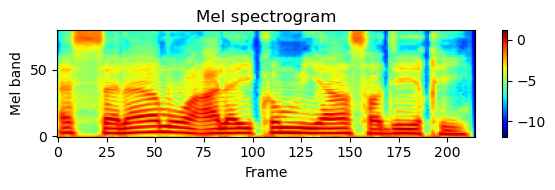

In [4]:
fig, ax = plt.subplots(figsize=(6, 2))
im = ax.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Frame')
ax.set_ylabel('Mel band')
ax.set_title("Mel spectrogram")
fig.tight_layout()

In [5]:
from models.fastpitch import FastPitch2Wave
model = FastPitch2Wave('pretrained/fastpitch_ar_adv.pth')
model = model.to(device=device)

wave, mel_spec = model.tts("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)

print("Audio output (FastPitch)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (FastPitch)


In [8]:
# This file needs to be run in the main folder
# %%
import text
from utils import read_lines_from_file


def write_lines_to_file(path, lines, mode='w', encoding='utf-8'):
    with open(path, mode, encoding=encoding) as f:
        for i, line in enumerate(lines):
            if i == len(lines)-1:
                f.write(line)
                break
            f.write(line + '\n')

# %%


lines = read_lines_from_file(r'C:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\datatext.txt')
#lines = read_lines_from_file('./data/test-orthographic-transcript.txt')

new_lines_arabic = []
new_lines_phonetic = []
new_lines_buckw = []

for line in lines:
    wav_name, utterance = line.split('" "')
    # wav_name, utterance = wav_name[1:], utterance[:-1]
    utterance = utterance.replace("a~", "~a") \
                         .replace("i~", "~i") \
                         .replace("u~", "~u") \
                         .replace(" - ", " ")

    
    utterance_arab = text.arabic_to_buckwalter(utterance)
    utterance_phon = text.arabic_to_phonemes(utterance)

    line_new_ara = f'"{wav_name}" "{utterance_arab}"'
    new_lines_buckw.append(line_new_ara)

    line_new_pho = f'"{wav_name}" "{utterance_phon}"'
    new_lines_phonetic.append(line_new_pho)

    line_new_buckw = f'"{wav_name}" "{utterance}"'
    new_lines_arabic.append(line_new_buckw)


# %% train

write_lines_to_file('./data/SA/train_arab.txt', new_lines_arabic)
write_lines_to_file('./data/SA/train_phon.txt', new_lines_phonetic)
write_lines_to_file('./data/SA/train_buckw.txt', new_lines_buckw)

# %% test

# write_lines_to_file('./data/test_arab.txt', new_lines_arabic)
# write_lines_to_file('./data/test_phon.txt', new_lines_phonetic)
# write_lines_to_file('./data/test_buckw.txt', new_lines_buckw)


In [18]:
text_unvoc = "اللغة العربية هي أكثر اللغات السامية تحدثا، وإحدى أكثر اللغات انتشارا في العالم"
wave_shakkala = model.tts(text_unvoc, vowelizer='shakkala')
wave_shakkelha = model.tts(text_unvoc, vowelizer='shakkelha')
IPython.display.display(
    IPython.display.Audio(data=0.5*wave_shakkala, rate=22050, normalize=False),
    IPython.display.Audio(data=0.5*wave_shakkelha, rate=22050, normalize=False)
    )

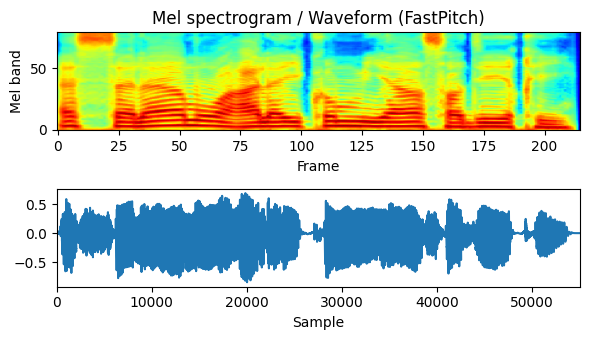

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (FastPitch)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()

### Test Multispeaker

In [2]:
from models.fastpitch import FastPitch2Wave
model = FastPitch2Wave('pretrained/fastpitch_ar_ms.pth')
model = model.to(device=device)

Traceback (most recent call last):
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\train.py", line 207, in <module>
    main()
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\train.py", line 125, in main
    config = get_config(args.config)
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\utils\__init__.py", line 37, in get_config
    custom_config = get_custom_config(fname)
                    ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\utils\__init__.py", line 25, in get_custom_config
    with open(fname, 'r') as stream:
         ^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'configs/nawar.yaml'


NameError: name 'device' is not defined

In [30]:
text = "اَلسَّلامُ عَلَيكُم يَا صَدِيقِي."
wave, mel_spec = model.tts(text, return_mel=True, 
                           denoise=0.005, speaker_id=2)

print("Audio output (FastPitch)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (FastPitch)


### Test Tacotron2

In [28]:
from models.tacotron2 import Tacotron2Wave
model = Tacotron2Wave('pretrained/tacotron2_ar_adv.pth')
model = model.to(device=device)

wave, mel_spec = model.tts(".اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)

print("Audio output (Tacotron2)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (Tacotron2)


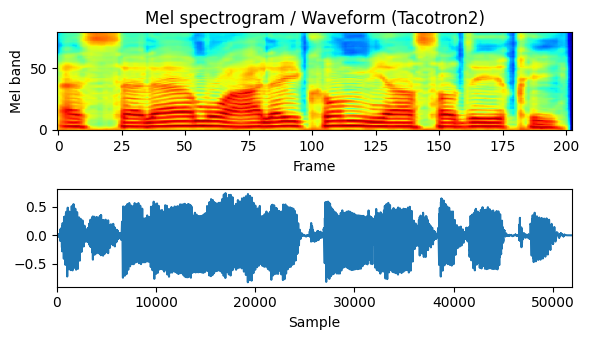

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (Tacotron2)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()

In [3]:
%cd tts-arabic-pytorch

[WinError 2] The system cannot find the file specified: 'tts-arabic-pytorch'
c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch


In [6]:
!python train.py --config configs/nawar_tc2.yaml


Caching datasets ...


Traceback (most recent call last):
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\train.py", line 207, in <module>
    main()
  File "c:\Users\ni-user\Downloads\New folder\tts-arabic-pytorch\train.py", line 144, in main
    train_dataset = ArabDataset(config.train_labels, config.train_wavs_path,
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: ArabDataset.__init__() got an unexpected keyword argument 'cache'


In [1]:
import argparse
import os
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from models.tacotron2.tacotron2_ms import Tacotron2MS

from utils import get_config
from utils.data import ArabDataset, text_mel_collate_fn
from utils.logging import TBLogger
from utils.training import *


# parser = argparse.ArgumentParser()
# parser.add_argument('--config', type=str,
#                     default="configs/nawar_tc2.yaml", help="Path to yaml config file")


@torch.inference_mode()
def validate(model, test_loader, writer, device, n_iter):
    loss_sum = 0
    n_test_sum = 0

    model.eval()

    for batch in test_loader:
        text_padded, input_lengths, mel_padded, gate_padded, \
            output_lengths = batch_to_device(batch, device)

        y_pred = model(text_padded, input_lengths,
                       mel_padded, output_lengths,
                       torch.zeros_like(output_lengths))                       
        mel_out, mel_out_postnet, gate_pred, alignments = y_pred

        mel_loss = F.mse_loss(mel_out, mel_padded) + \
            F.mse_loss(mel_out_postnet, mel_padded)
        gate_loss = F.binary_cross_entropy_with_logits(gate_pred, gate_padded)
        loss = mel_loss + gate_loss

        loss_sum += mel_padded.size(0)*loss.item()
        n_test_sum += mel_padded.size(0)

    val_loss = loss_sum / n_test_sum

    idx = random.randint(0, mel_padded.size(0) - 1)
    mel_infer, *_ = model.infer(
        text_padded[idx:idx+1], input_lengths[idx:idx+1]*0, input_lengths[idx:idx+1])

    writer.add_sample(
        alignments[idx, :, :input_lengths[idx].item()],
        mel_out[idx], mel_padded[idx], mel_infer[0],
        output_lengths[idx], n_iter)

    writer.add_scalar('loss/val_loss', val_loss, n_iter)

    model.train()

    return val_loss


def training_loop(model,
                  optimizer,
                  train_loader,
                  test_loader,
                  writer,
                  device,
                  config,
                  n_epoch,
                  n_iter):

    model.train()

    for epoch in range(n_epoch, config.epochs):
        print(f"Epoch: {epoch}")
        for batch in train_loader:

            text_padded, input_lengths, mel_padded, gate_padded, \
                output_lengths = batch_to_device(batch, device)

            y_pred = model(text_padded, input_lengths,
                           mel_padded, output_lengths,
                           torch.zeros_like(output_lengths))
            mel_out, mel_out_postnet, gate_out, _ = y_pred

            optimizer.zero_grad()

            # LOSS
            mel_loss = F.mse_loss(mel_out, mel_padded) + \
                F.mse_loss(mel_out_postnet, mel_padded)
            gate_loss = F.binary_cross_entropy_with_logits(
                gate_out, gate_padded)
            loss = mel_loss + gate_loss

            loss.backward()
            grad_norm = torch.nn.utils.clip_grad_norm_(
                model.parameters(), config.grad_clip_thresh)
            optimizer.step()

            # LOGGING
            print(f"loss: {loss.item()}, grad_norm: {grad_norm.item()}")

            # writer.add_training_data(loss.item(), grad_norm.item(),
            #                          config.learning_rate, n_iter)
            print('-------------')

            # if n_iter % config.n_save_states_iter == 0:
            #     save_states(f'states.pth', model, optimizer,
            #                 n_iter, epoch, config)

            if n_iter % config.n_save_backup_iter == 0 :
                save_states(f'states_{n_iter}.pth', model,
                            optimizer, n_iter, epoch, config,config)

            n_iter += 1

        # VALIDATE
        val_loss = validate(model, test_loader, writer, device, n_iter)
        print(f"Validation loss: {val_loss}")

        save_states(f'states_{n_iter}.pth', model,
                    optimizer, n_iter, epoch,config,config)


def main():
    #args = parser.parse_args()
    config = get_config('configs/nawar_tc2.yaml')

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # set random seed
    if config.random_seed != False:
        torch.manual_seed(config.random_seed)
        torch.manual_seed_all(config.random_seed)
        import numpy as np
        np.random.seed(config.random_seed)

    # make checkpoint folder if nonexistent
    if not os.path.isdir(config.checkpoint_dir):
        os.makedirs(os.path.abspath(config.checkpoint_dir))
        print(f"Created checkpoint_dir folder: {config.checkpoint_dir}")

    # datasets
    if config.cache_dataset:
        print('Caching datasets ...')
    train_dataset = ArabDataset(config.train_labels, config.train_wavs_path
                                )
    test_dataset = ArabDataset(config.test_labels, config.test_wavs_path,
                              )

    # optional: balanced sampling
    sampler, shuffle, drop_last = None, True, True
    if config.balanced_sampling:
        weights = torch.load(config.sampler_weights_file)

        sampler = torch.utils.data.WeightedRandomSampler(
            weights, len(weights), replacement=False)
        shuffle, drop_last = False, False

    # dataloaders
    train_loader = DataLoader(train_dataset,
                              batch_size=config.batch_size,
                              collate_fn=text_mel_collate_fn,
                              shuffle=shuffle, drop_last=drop_last,
                              sampler=sampler)

    test_loader = DataLoader(test_dataset,
                             batch_size=config.batch_size, drop_last=False,
                             shuffle=False, collate_fn=text_mel_collate_fn)

    # construct model
    model = Tacotron2MS(n_symbol=40)
    model = model.to(device)
    model.decoder.decoder_max_step = config.decoder_max_step

    # optimizer
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=config.learning_rate,
                                  weight_decay=config.weight_decay)

    # resume from existing checkpoint
    n_epoch, n_iter = 0, 0
    # if config.restore_model != '':
    #     state_dicts = torch.load(config.restore_model)
    #     model.load_state_dict(state_dicts['model'])
    #     if 'optim' in state_dicts:
    #         optimizer.load_state_dict(state_dicts['optim'])
    #     if 'epoch' in state_dicts:
    #         n_epoch = state_dicts['epoch']
    #     if 'iter' in state_dicts:
    #         n_iter = state_dicts['iter']

    # tensorboard writer
    writer = TBLogger(config.log_dir)

    # start training
    training_loop(model,
                  optimizer,
                  train_loader,
                  test_loader,
                  writer,
                  device,
                  config,
                  n_epoch,
                  n_iter)


if __name__ == '__main__':
    main()


Caching datasets ...
[==============================] 100.0%
[==============================] 100.0%
Epoch: 0
loss: 31.10790252685547, grad_norm: 20.75447654724121
-------------
loss: 27.536575317382812, grad_norm: 24.87521743774414
-------------
loss: 13.835848808288574, grad_norm: 13.375961303710938
-------------
loss: 9.603079795837402, grad_norm: 16.681201934814453
-------------


In [10]:
config = get_config('configs/nawar_tc2.yaml')

In [12]:
config.cache_dataset

True